### 알림 
    -  4번 문제에서 pd.read_csv 에서 'str' object.. not callable Error가 발생하여 파일명을 임의로 변경하였음
        - 'LEVEL TEST_문제' -> 'LEVEL TEST'  
    




In [140]:
import pandas as pd
import numpy as np

from datetime import datetime



### 1번 문제
> For문을 이용하여 구구단을 출력하라
    2단부터 9단까지 구구단을 print를 이용하여 출력하라.

In [141]:
# f string 

for i in range(2, 10, 1) : 
    for j in range (1, 10, 1) :
        a = i * j
        print(f"{i}x{j} = {a}")
    
    



2x1 = 2
2x2 = 4
2x3 = 6
2x4 = 8
2x5 = 10
2x6 = 12
2x7 = 14
2x8 = 16
2x9 = 18
3x1 = 3
3x2 = 6
3x3 = 9
3x4 = 12
3x5 = 15
3x6 = 18
3x7 = 21
3x8 = 24
3x9 = 27
4x1 = 4
4x2 = 8
4x3 = 12
4x4 = 16
4x5 = 20
4x6 = 24
4x7 = 28
4x8 = 32
4x9 = 36
5x1 = 5
5x2 = 10
5x3 = 15
5x4 = 20
5x5 = 25
5x6 = 30
5x7 = 35
5x8 = 40
5x9 = 45
6x1 = 6
6x2 = 12
6x3 = 18
6x4 = 24
6x5 = 30
6x6 = 36
6x7 = 42
6x8 = 48
6x9 = 54
7x1 = 7
7x2 = 14
7x3 = 21
7x4 = 28
7x5 = 35
7x6 = 42
7x7 = 49
7x8 = 56
7x9 = 63
8x1 = 8
8x2 = 16
8x3 = 24
8x4 = 32
8x5 = 40
8x6 = 48
8x7 = 56
8x8 = 64
8x9 = 72
9x1 = 9
9x2 = 18
9x3 = 27
9x4 = 36
9x5 = 45
9x6 = 54
9x7 = 63
9x8 = 72
9x9 = 81


### 2번 문제
> 2부터 50까지 소수를 리스트의 형태로 출력하시오
1. 첫번째 반복문에서는 2부터 50까지 반복을 하는 반복문을 구성하시오
2. 소수는 1과 자기 자신 외에는 나누어지지 않는 수이다 
3. 반복문 안에 bool의 형태의 데이터를 만들어서 True라 지정한다. 
4. 두번째 반복문을 이용하여 2부터 시작하여 (자기 자신 -1)까지 나누어 나머지 값이 0이면 3번 과정에서 만든 변수를 False로 변경한다.
5. bool 형태의 변수를 조건문을 사용하여 True인 경우 리스트에 추가한다.

In [142]:
# check 
    # i=2 일때, j, 2로 시작 but 1로 끝 ? -> just pass w/ (x = True) ?  (  )

_prime = []

for i in range(2, 51, 1) :
    x = True
    for j in range(2, i, 1) :
        if i % j == 0 :
            x = False
            break 
    if x :
        _prime += [i] 

print(_prime)



[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


### 3번 문제
> Pandas를 이용하여 다음과 같은 데이터프레임을 만들고 데이터프레임을 수정하라.

|   | 0 | 1 |  2 |
|:-:|:-:|:-:|:--:|
| 0 | 1 | 2 |  3 |
| 1 | 7 | 8 |  9 |
| 2 | 4 | 5 |  6 |
| 3 | 3 | 5 | 10 |

1. 컬럼의 이름을 A, B, C로 변경
2. D라는 새로운 컬럼에 shift 함수를 이용하여 C 컬럼의 차를 D 컬럼에 생성(NaN값인 경우에는 0으로 대체)
3. A 컬럼을 기준으로 오름차순 정렬
4. 인덱스의 값을 새로 지정(기존의 인덱스는 삭제)
5. 이 모든 과정은 원본의 데이터를 수정 

In [143]:
# memo
    # 5. inplace
# check
    # 1 vs 2 중 2가 더 효율적? (1. 가독성 better이어도? )
        # 1. (df - df.shift())['col'] 
        # 2. df['col'] - df.shift()['col']  
        # 별도로, "1.형태도 정상실행 가능" 기억할 것 
    # series, fillna() 가능
    # sort_values('col') : 'col'기준으로 index 전체 재배열 -> 2번 왜 했지 & 다시해야하나

df = pd.DataFrame({
    'A' : [1,7,4,3],
    'B' : [2,8,5,5],
    'C' : [3,9,6,10]
})

df['D'] = (df - df.shift(1))['C'].fillna(0) 
# df

df.sort_values('A', inplace = True)
# df

df.reset_index(drop = True, inplace=True)
df


,A,B,C,D
0,1,2,3,0.0
1,3,5,10,4.0
2,4,5,6,-3.0
3,7,8,9,6.0


### 4번 문제
> 2014,2015,2016 csv파일을 로드하여 데이터를 수정하라.

1. 3개의 데이터프레임을 결합하시오 (유니언 결합)
2. 구분 컬럼의 값을 datetime의 형태로 변환하라. 
3. 구분 컬럼에서 년도만 따로 출력하여 파생변수 년도를 생성하라.
4. 년도 별 평균 사망자, 총 사망자를 출력하라. 
5. 년도 별 사고 대비 사망율( 사망(명) / 사고(건))을 출력하라.

In [144]:
# csv 로드
df1 = pd.read_csv('../csv_lvtest/2014.csv', encoding= 'euc_kr')
df2 = pd.read_csv('../csv_lvtest/2015.csv', encoding= 'euc_kr')
df3 = pd.read_csv('../csv_lvtest/2016.csv', encoding= 'euc_kr')

# df1
# df2
# df3

# 1. 유니언 결합
_df = pd.concat([df1, df2, df3])
# _df.shape # row 수 확인

# 2. 시계열 변환
_df['구분'] = pd.to_datetime(_df['구분'], format= '%Y년%m월')
# _df.info() # dtype 확인

# 3. 파생변수 '년도' 컬럼 추가
_df['년도'] = _df['구분'].apply(lambda x : datetime.strftime(x, '%Y'))
# _df.loc[_df['년도'] != _df.shift(1)['년도']] # 연도 3개 모두 '구분'컬럼 잘 추가되었는지 확인

# 4. 평균사망자, 총사망자 출력
print(_df[['년도', '사망(명)']].groupby('년도').agg(['mean', 'sum']))

# 5. 사고대비사망률 출력
_total = _df[['년도','사고(건)', '사망(명)']].groupby('년도').sum()
print('      사고 대비 사망률(%)')
print(_total['사망(명)'] / _total['사고(건)']*100)


          사망(명)     
           mean  sum
년도                  
2014  10.833333  130
2015   9.000000  108
2016   8.166667   98
      사고 대비 사망률(%)
년도
2014    5.358615
2015    3.998519
2016    4.027949
dtype: float64


In [145]:
# 4번 메모
# concat, to_datetime or strptime, 4. print, 5. print  까먹지 말고 
# 5. 년도별 총사고/총사건
# 함수 반복문?
#  그룹화 sum = _total <- new dataframe
# _total의 두컬럼을 나눈 값 출력
# _total = _df[['년도','사고(건)', '사망(명)']].groupby('년도').sum()
# _total['사망(명)'] / _total['사고(건)']

# Check
    # series 출력시, 제목 붙이는 법이 있나? (  )

### 5번 문제
> 세종시.csv 파일을 pandas를 이용하여 read 후 데이터프레임을 수정하라.

1. pandas를 이용하여 csv 파일을 로드한다. (주소는 상대경로로 지정)
2. "법정동코드", "특수지구분코드", "특수지구분명", "공동주택코드", "특수지명" 컬럼을 삭제한다. 
3. "기준연월" 파생변수를 생성하여 "기준연도" + "기준월" 데이터를 삽입한다. 
4. pivot_table을 이용하여 인덱스는 "기준연월" 컬럼은 "공동주택구분명" 벨류는 "공시가격"으로 평균값을 구하고 결측치의 값은 0으로 한 뒤 바형 그래프로 출력한다. 
5. 한글이 포함되어 있음으로 한글을 표시가 될수 있도록 폰트를 변경하여 시각화를 한다.

In [146]:
# 5번 메모
# 1. 상대경로
# 2. 일일히 다 적지 않고 하는 방법도 있나? 조건? -> drop
# 4. pivot_table (index_col? or set_index?) 

In [147]:
# 1. csv 로드

df = pd.read_csv('../csv_lvtest/세종시.csv', encoding= 'euc_kr')
df.head(1)

C:\Users\zino0\AppData\Local\Temp\ipykernel_25288\3494892137.py:3: DtypeWarning: Columns (5,11,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv_lvtest/세종시.csv', encoding= 'euc_kr')


,고유번호,법정동코드,법정동명,특수지구분코드,특수지구분명,지번,기준연도,기준월,공동주택코드,공동주택구분코드,공동주택구분명,특수지명,공동주택명,동명,층명,호명,전용면적,공시가격,데이터기준일자
0,3611010100100350005,3611010100,세종특별자치시 반곡동,1,일반,35-5,2020,1,20393439,1,아파트,4-1생활권 M1블록,수루배마을1단지,101동,12,1201,96.93,475000000,2020-07-27


In [148]:
df.columns # 컬럼 전체 확인

Index(['고유번호', '법정동코드', '법정동명', '특수지구분코드', '특수지구분명', '지번', '기준연도', '기준월',
       '공동주택코드', '공동주택구분코드', '공동주택구분명', '특수지명', '공동주택명', '동명', '층명', '호명',
       '전용면적', '공시가격', '데이터기준일자'],
      dtype='object')

In [149]:
df.info() # 컬럼수 및 (3번 위해 '기준연도'&'기준월')Dtype 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680248 entries, 0 to 680247
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   고유번호      680248 non-null  int64  
 1   법정동코드     680248 non-null  int64  
 2   법정동명      680248 non-null  object 
 3   특수지구분코드   680248 non-null  int64  
 4   특수지구분명    680248 non-null  object 
 5   지번        680248 non-null  object 
 6   기준연도      680248 non-null  int64  
 7   기준월       680248 non-null  int64  
 8   공동주택코드    680248 non-null  int64  
 9   공동주택구분코드  680248 non-null  int64  
 10  공동주택구분명   680248 non-null  object 
 11  특수지명      100425 non-null  object 
 12  공동주택명     680248 non-null  object 
 13  동명        665137 non-null  object 
 14  층명        680248 non-null  int64  
 15  호명        680248 non-null  object 
 16  전용면적      680248 non-null  float64
 17  공시가격      680248 non-null  int64  
 18  데이터기준일자   680248 non-null  object 
dtypes: float64(1), int64(9), object(9)
memory us

In [150]:
# 2. 컬럼 삭제

df.drop(['법정동코드', '특수지구분코드', '특수지구분명', '공동주택코드', '특수지명'], axis = 1, inplace= True)
df.head(1)

,고유번호,법정동명,지번,기준연도,기준월,공동주택구분코드,공동주택구분명,공동주택명,동명,층명,호명,전용면적,공시가격,데이터기준일자
0,3611010100100350005,세종특별자치시 반곡동,35-5,2020,1,1,아파트,수루배마을1단지,101동,12,1201,96.93,475000000,2020-07-27


In [151]:
len(df.columns) # 컬럼 수로 삭제여부 재확인 : 19 -> 14



14

In [152]:
#3. '기준연월' 파생변수 (by using columns '기준연도' & ' 기준월')

# Dtype : int 이기에 숫자 연산 되므로, 문자열로 데이터 형태 변환
df['기준연도'] = df['기준연도'].astype('str')
df['기준월'] = df['기준월'].astype('str')

df['기준연월'] = df['기준연도'] + ['-'] +df['기준월']
df.tail(3)


,고유번호,법정동명,지번,기준연도,기준월,공동주택구분코드,공동주택구분명,공동주택명,동명,층명,호명,전용면적,공시가격,데이터기준일자,기준연월
680245,3611039023104670000,세종특별자치시 소정면 대곡리,467,2022,1,5,다세대,대명아트빌라,NaN,3,302,53.34,22100000,2022-07-26,2022-1
680246,3611039023104670000,세종특별자치시 소정면 대곡리,467,2022,1,5,다세대,대명아트빌라,NaN,3,301,53.34,22100000,2022-07-26,2022-1
680247,3611039023104670000,세종특별자치시 소정면 대곡리,467,2022,1,5,다세대,대명아트빌라,NaN,1,101,53.34,20300000,2022-07-26,2022-1


In [153]:
# 4번, 사전작업

df4 = df[['기준연월', '공동주택구분명', '공시가격']].groupby(['기준연월','공동주택구분명']).mean()

pd.options.display.float_format = '{: 2f}'.format
df4


공시가격
기준연월   공동주택구분명                  
2012-6 다세대       25870967.741935
       빌라        75526315.789474
2013-1 다세대       27782812.500000
       빌라        49530991.735537
       아파트       96525381.818182
2013-6 다세대       26916666.666667
       빌라        27473684.210526
       아파트      158019328.585961
2014-1 다세대       31463818.056513
       빌라        51030716.723549
       아파트      112496434.992870
2014-6 빌라        33821428.571429
       아파트      165085487.077535
2015-1 다세대       31703546.099291
       빌라        49699175.824176
       아파트      154175918.979745
2015-6 다세대      113545454.545455
       빌라        63804878.048780
       아파트      227785217.391304
2016-1 다세대       34001887.979862
       빌라        52673008.323424
       아파트      166642757.613961
2016-6 아파트      158073949.064130
2017-1 다세대       34135871.617369
       빌라        54216069.489685
       아파트      180031955.256594
2017-6 아파트      290577376.425856
2018-1 다세대       35462492.133417
       빌라        56490770.901194
       아파트      197850692.393516
2018-6 빌라       101270270.270270
       아파트       92166666.666667
2019-1 다세대       37082207.067576
       빌라        59389352.818372
       아파트      201050463.267226
2019-6 다세대       92200000.000000
       아파트      182694133.452754
2020-1 다세대       36008662.969809
       빌라        64070093.457944
       아파트      211755690.176880
2020-6 빌라        89875882.352941
       아파트       47926530.612245
2021-1 다세대       37656721.915285
       빌라        64129963.099631
       아파트      411193170.866895
2021-6 아파트      253257406.402604
2022-1 다세대       39675070.336391
       빌라        67956088.560886
       아파트      397292503.885647

In [154]:
# 4번, 사전작업_2 : 5. 한글 깨짐 방지

import platform 
import matplotlib.pyplot as plt

if platform.system() == 'Darwin' : # MAC 인 경우
    plt.rc('font', family = 'AppleGothic')
    
else :
    plt.rc('font', family = 'Malgun Gothic')


<Axes: xlabel='기준연월'>

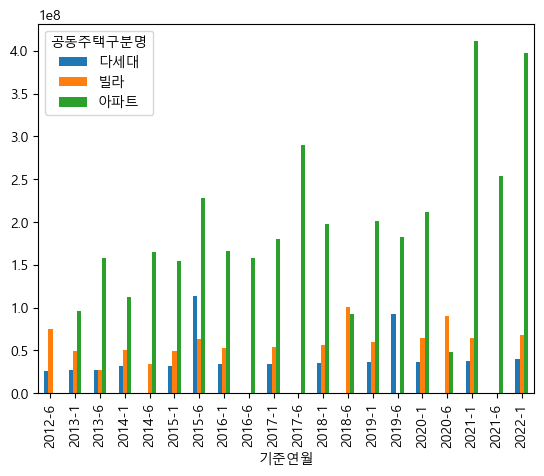

In [158]:
# 4. pivot_table 
# 사전작업 groupby 단계에서 mean() 이미 완료 -> pivot_table 매개변수 aggfunc 생략 (인자값 'mean'써도 동일값으로 구성)

df_pivot = pd.pivot_table(df4, index ='기준연월', columns = '공동주택구분명',values = '공시가격').fillna(0)
# df_pivot

df_pivot.plot.bar()